In [9]:
%load_ext autoreload
%autoreload 2
from lib import plot_time_series, plot_wind_speed
import numpy as np
import numpy as np 
import netCDF4 as nc
from scipy import stats
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PATH = "../data/1991TS"
FILENAME = "fg.T1Hmax.UMRA2T.19910428_19910501.BOB01.4p4km.nc"

fn = f"{PATH}/{FILENAME}"
fg = nc.Dataset(fn)
    
lat = fg.variables["latitude"][:]
lng = fg.variables["longitude"][:]
wind_speed = fg.variables["wind_speed_of_gust"][:]

In [3]:
thresh_wind = np.array(
    [[np.where(frame < wind_speed.max() * .3, np.nan, frame) for frame in ensemble ] for ensemble in wind_speed ])

below_wind = np.array(
    [[np.where(frame < wind_speed.max() * .3, frame, np.nan) for frame in ensemble ] for ensemble in wind_speed ])

clouds = np.array(
    [[np.where(stats.zscore(frame, nan_policy="omit") > -1, frame, np.nan) for frame in ensemble] for ensemble in below_wind])

In [38]:
maxlevel = np.nanmax(wind_speed)
    
steps = 7
levels = [((maxlevel)/steps) * val for val in list(range(steps + 1))]

maxlevel = np.nanmax(clouds)
steps = 7
cloud_levels = [((maxlevel)/steps) * val for val in list(range(steps + 1))]

In [50]:
plot_time_series("output2.gif", lng, lat, thresh_wind[:40], clouds[:40])

Before savefig: 0 2022-04-23 16:39:49.893987
After savefig: 0 2022-04-23 16:39:58.166201
Done with frame: 0 2022-04-23 16:39:58.166921
Before savefig: 1 2022-04-23 16:39:58.751959
After savefig: 1 2022-04-23 16:40:06.446103
Done with frame: 1 2022-04-23 16:40:06.446503
Before savefig: 2 2022-04-23 16:40:07.044788
After savefig: 2 2022-04-23 16:40:14.392431
Done with frame: 2 2022-04-23 16:40:14.393232
Before savefig: 3 2022-04-23 16:40:15.011716
After savefig: 3 2022-04-23 16:40:22.161838
Done with frame: 3 2022-04-23 16:40:22.163017
Before savefig: 4 2022-04-23 16:40:23.301061
After savefig: 4 2022-04-23 16:40:30.659534
Done with frame: 4 2022-04-23 16:40:30.659950
Before savefig: 5 2022-04-23 16:40:31.287958
After savefig: 5 2022-04-23 16:40:38.369879
Done with frame: 5 2022-04-23 16:40:38.370260
Before savefig: 6 2022-04-23 16:40:39.006005
After savefig: 6 2022-04-23 16:40:46.025430
Done with frame: 6 2022-04-23 16:40:46.026121
Before savefig: 7 2022-04-23 16:40:46.674964
After save

In [34]:
cloud_levels

[0.0, 4.25, 8.5, 12.75, 17.0, 21.25, 25.5, 29.75]

In [53]:
print("চট্টগ্রাম")

চট্টগ্রাম


In [32]:
len(clouds[clouds > 25.5])


1509408

In [31]:
len(clouds.flatten())

276436800

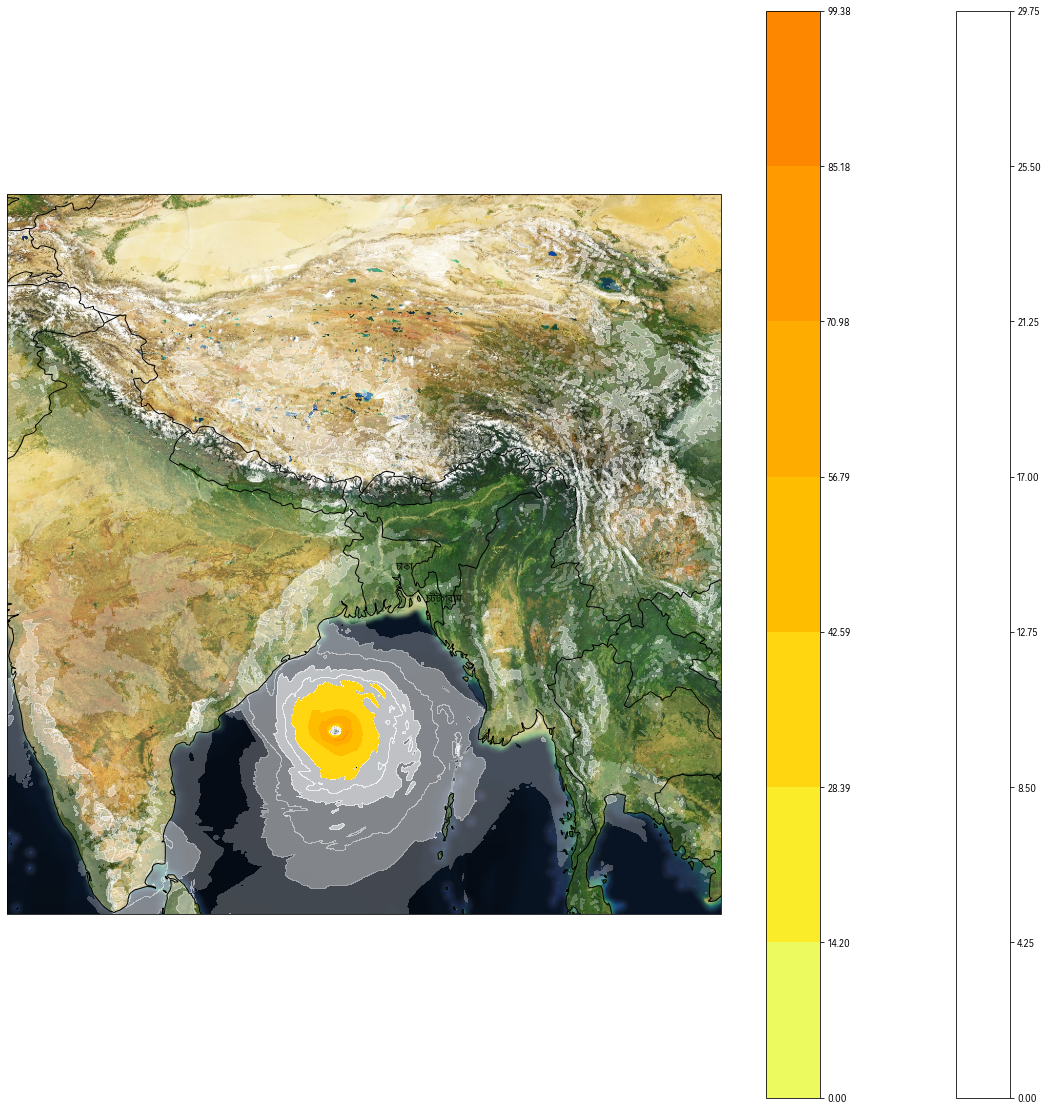

In [55]:
fig, ax = plot_wind_speed(lng, lat, thresh_wind[0][0], levels, clouds=clouds[0][0], cloud_levels=cloud_levels)
fig.set_size_inches(20, 20)
plt.show()

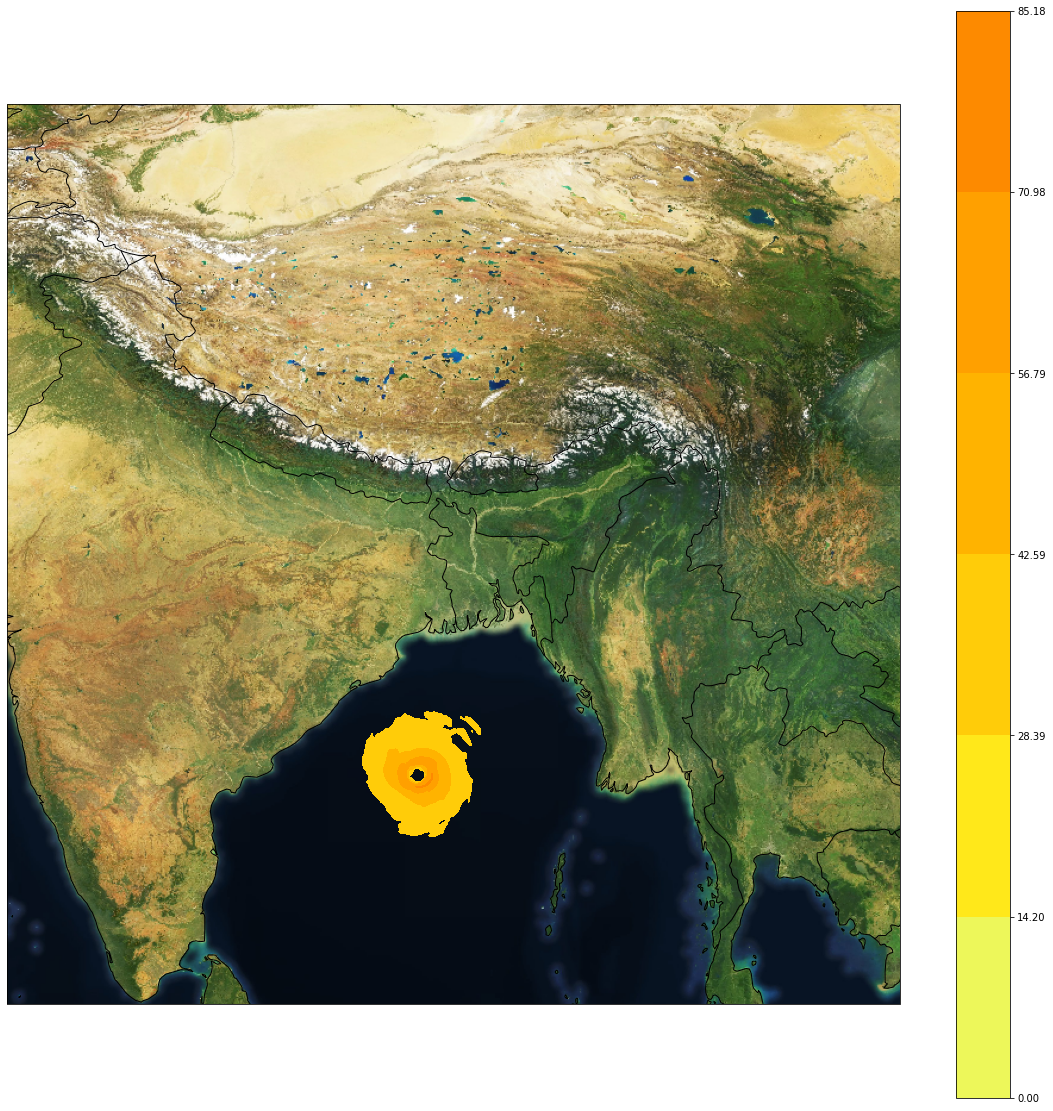

In [12]:
fig, ax = plot_wind_speed(lng, lat, thresh_wind[0][0], levels)# , clouds=clouds[0][0], cloud_levels=cloud_levels)
fig.set_size_inches(20, 20)
plt.show()

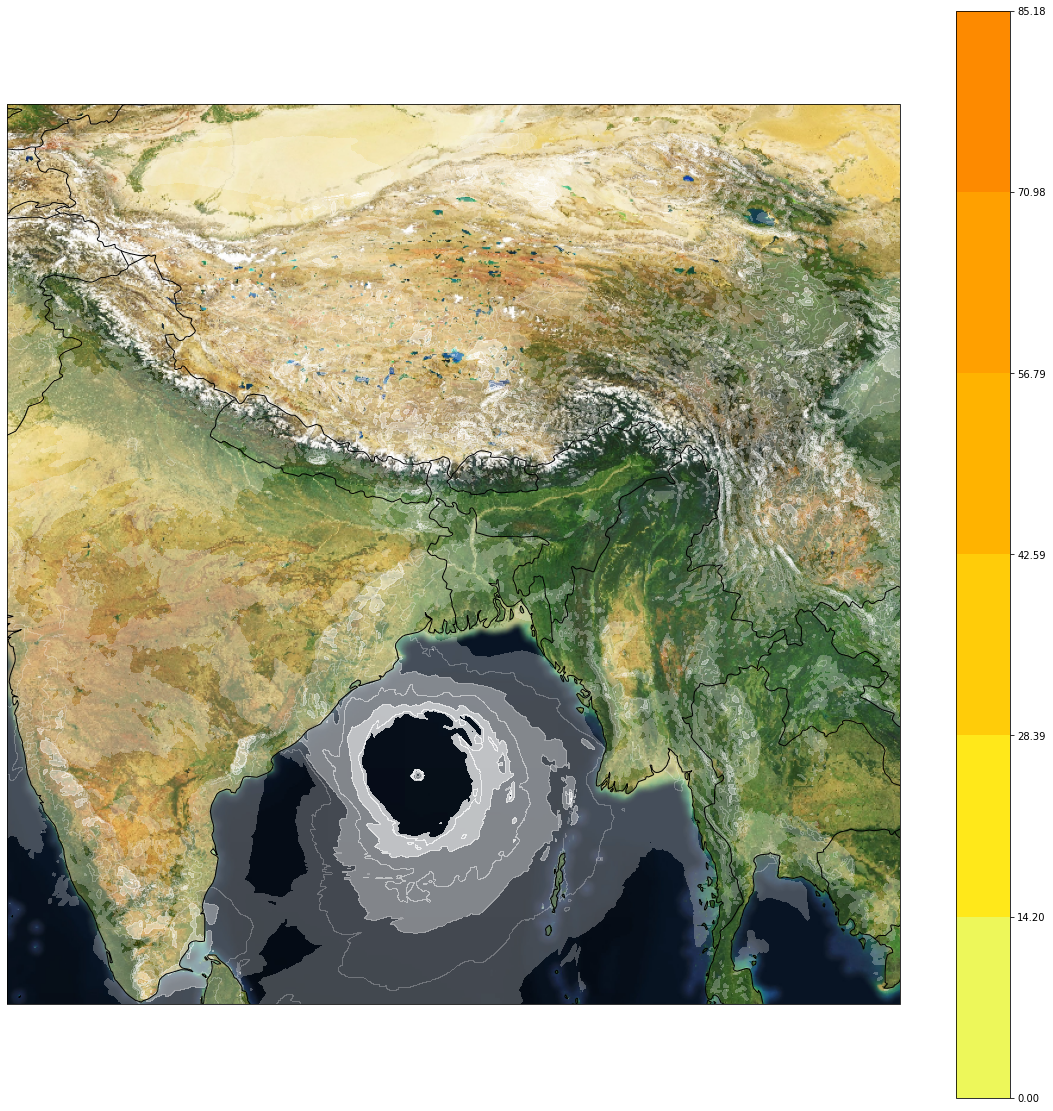

In [22]:

fig, ax = plot_wind_speed(lng, lat, np.full((790, 810), np.nan), levels, clouds=below_wind[0][0])
fig.set_size_inches(20, 20)
plt.show()

/var/folders/7q/b589lf2n00xgsrpx3vcfqgq80000gn/T/ipykernel_16955/1263211538.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


KeyboardInterrupt: 

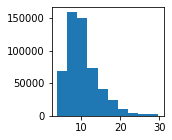

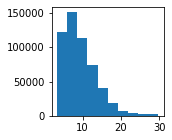

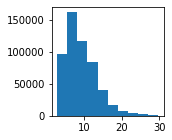

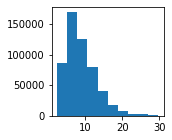

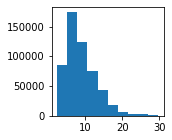

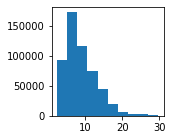

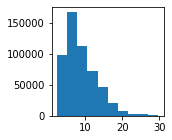

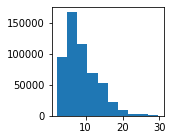

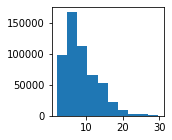

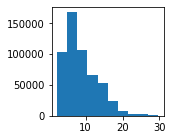

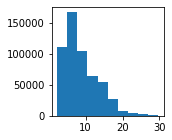

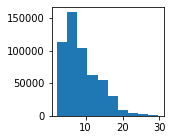

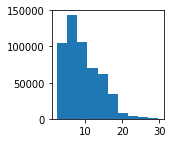

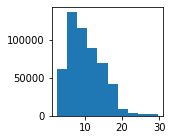

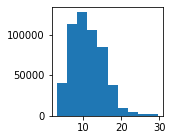

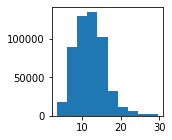

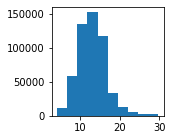

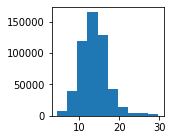

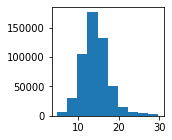

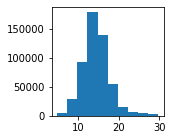

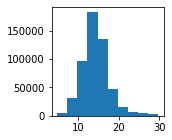

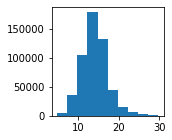

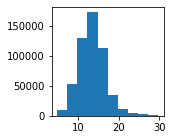

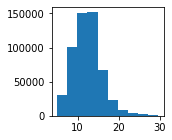

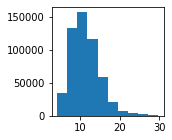

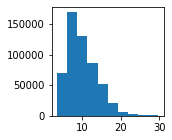

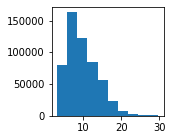

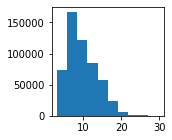

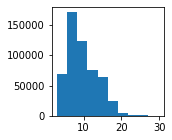

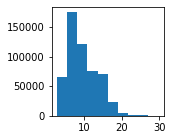

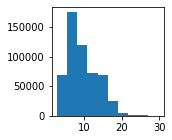

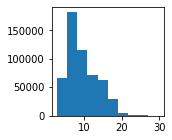

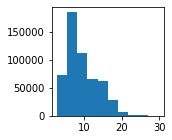

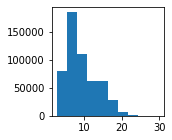

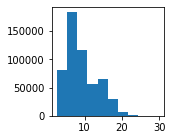

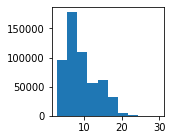

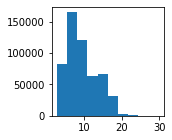

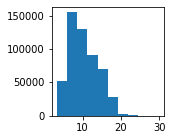

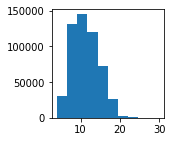

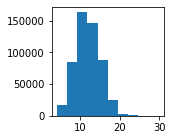

<Figure size 432x288 with 0 Axes>

In [45]:
for frame in clouds: 
    fig = plt.figure()
    plt.hist(frame[8].flatten())
    fig.set_size_inches((2,2))
    plt.show()